This notebook generates figures illustrating the uncertainty analysis of the wave equation, as described in Supplementary Material Section 3.

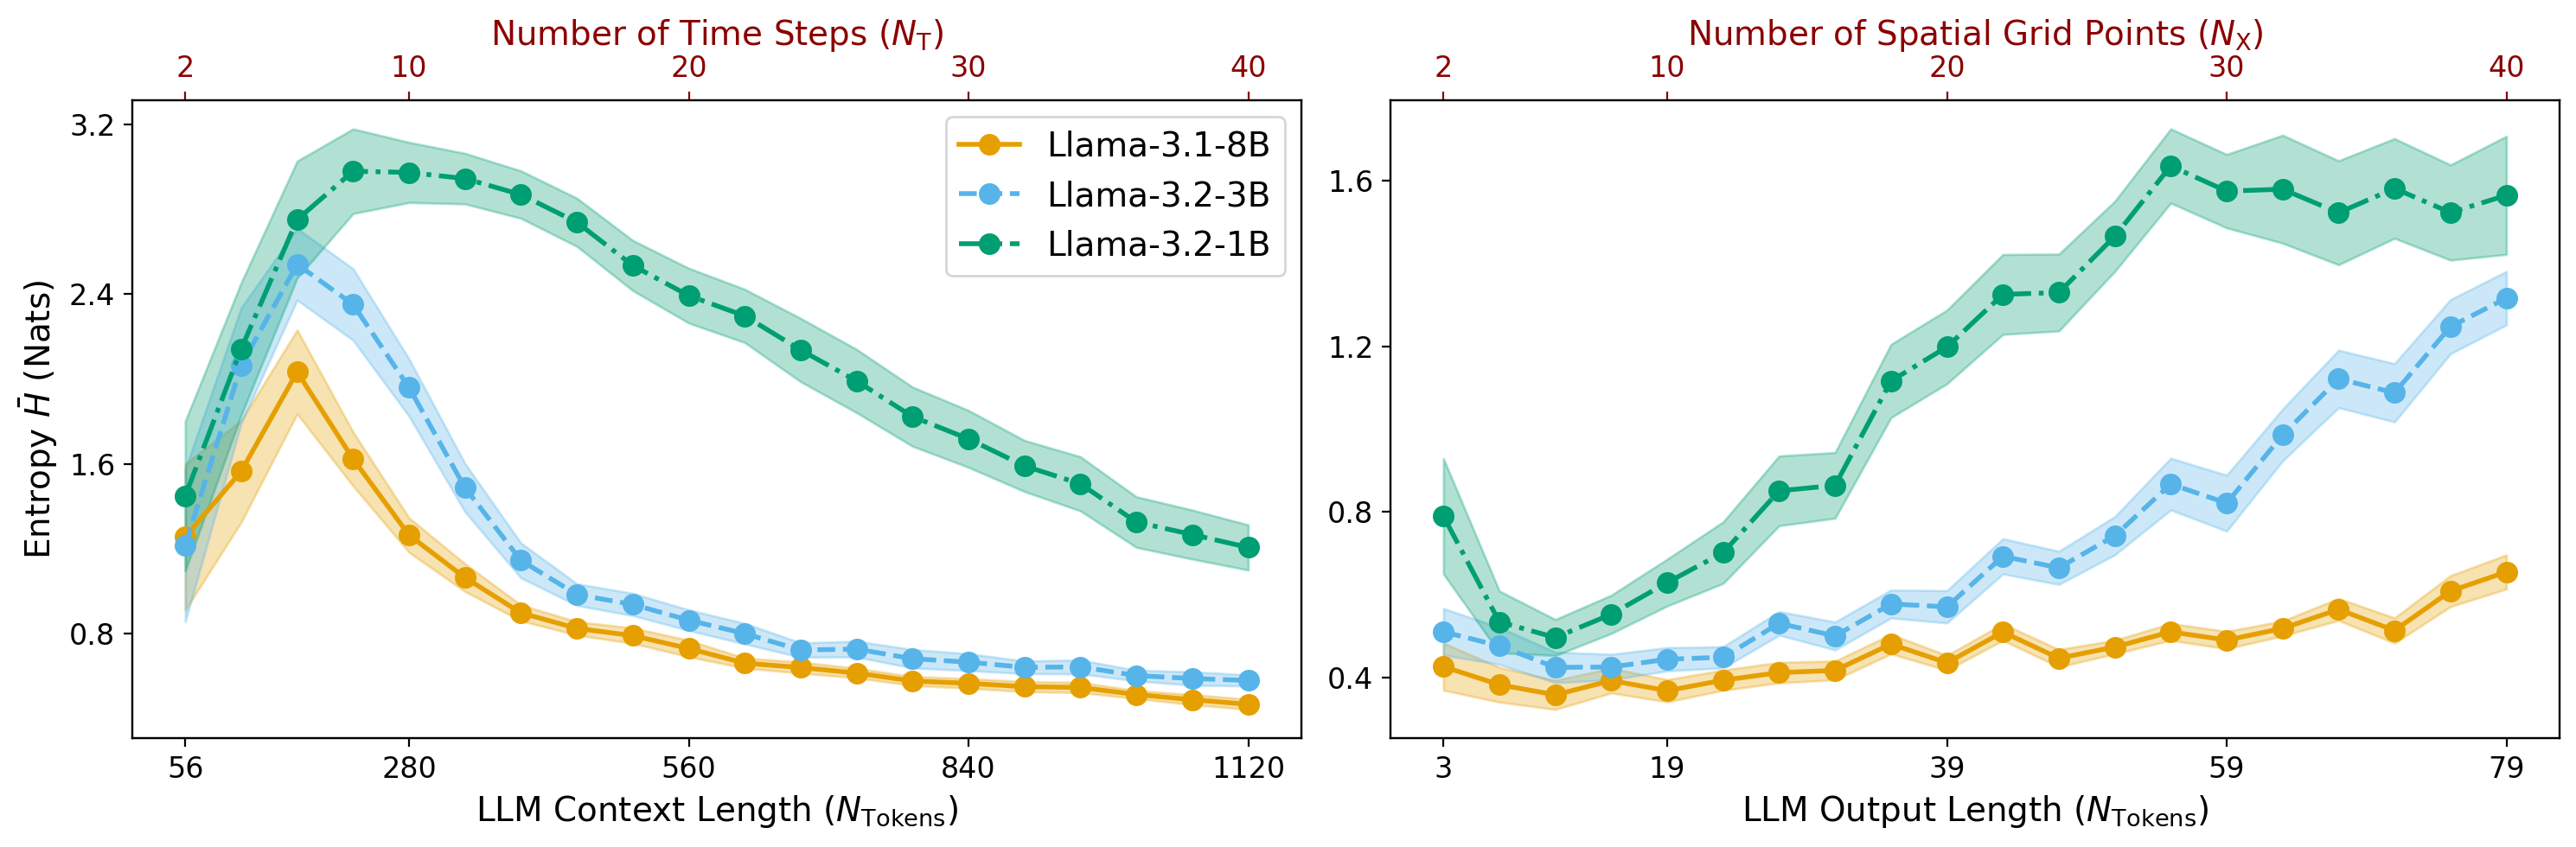

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MaxNLocator

def plot_combined_entropy_with_ci(data_1B_time, data_3B_time, data_8B_time,
                                  data_1B_space, data_3B_space, data_8B_space,
                                  all_Nt_values, n_seeds=50):
    # t-value for 95% confidence interval
    t_value = stats.t.ppf(0.975, df=n_seeds-1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=200)
    
    colors = [
        "#E69F00",  # Llama-3.1-8B
        "#56B4E9",  # Llama-3.2-3B
        "#009E73",  # Llama-3.2-1B
    ]
    
    # Left plot: temporal discretization
    mean_entropies_1B = data_1B_time['mean_entropies_1B']
    se_entropies_1B = data_1B_time['se_entropies_1B']
    mean_entropies_3B = data_3B_time['mean_entropies_3B']
    se_entropies_3B = data_3B_time['se_entropies_3B']
    mean_entropies_8B = data_8B_time['mean_entropies_8B']
    se_entropies_8B = data_8B_time['se_entropies_8B']
    ax1.plot(all_Nt_values, mean_entropies_8B, 'o-', color=colors[0],
             linewidth=2, label='Llama-3.1-8B', markersize=8)
    ax1.fill_between(all_Nt_values, mean_entropies_8B - t_value * se_entropies_8B,
                     mean_entropies_8B + t_value * se_entropies_8B, color=colors[0], alpha=0.3)
    ax1.plot(all_Nt_values, mean_entropies_3B, 'o--', color=colors[1],
             linewidth=2, label='Llama-3.2-3B', markersize=8)
    ax1.fill_between(all_Nt_values, mean_entropies_3B - t_value * se_entropies_3B,
                     mean_entropies_3B + t_value * se_entropies_3B, color=colors[1], alpha=0.3)
    ax1.plot(all_Nt_values, mean_entropies_1B, 'o-.', color=colors[2],
             linewidth=2, label='Llama-3.2-1B', markersize=8)
    ax1.fill_between(all_Nt_values, mean_entropies_1B - t_value * se_entropies_1B,
                     mean_entropies_1B + t_value * se_entropies_1B, color=colors[2], alpha=0.3)
    ax1.yaxis.set_major_locator(MaxNLocator(nbins=5))
    # Bottom x-axis for token counts
    key_ticks = [2, 10, 20, 30, 40]
    token_ticks = [nt * 28 for nt in key_ticks]
    ax1.set_xticks(key_ticks)
    ax1.set_xticklabels(token_ticks)
    ax1.set_xlabel('LLM Context Length ($N_{\\text{Tokens}}$)', fontsize=14)
    ax1.set_ylabel('Entropy $\\bar{H}$ (Nats)', fontsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    # Top x-axis for time steps
    ax1_top = ax1.twiny()
    ax1_top.set_xlim(ax1.get_xlim())
    ax1_top.set_xticks(key_ticks)
    ax1_top.set_xticklabels(key_ticks)
    ax1_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", fontsize=14, color='darkred')
    ax1_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
    ax1.legend(loc='upper right', fontsize=14, handlelength=1.8)
    
    # Right polt: spatial discretization
    mean_entropies_1B = data_1B_space['mean_entropies_1B_Nx']
    se_entropies_1B = data_1B_space['se_entropies_1B_Nx']
    mean_entropies_3B = data_3B_space['mean_entropies_3B_Nx']
    se_entropies_3B = data_3B_space['se_entropies_3B_Nx']
    mean_entropies_8B = data_8B_space['mean_entropies_8B_Nx']
    se_entropies_8B = data_8B_space['se_entropies_8B_Nx']
    ax2.plot(all_Nt_values, mean_entropies_8B, 'o-', color=colors[0],
             linewidth=2, markersize=8)
    ax2.fill_between(all_Nt_values, mean_entropies_8B - t_value * se_entropies_8B,
                     mean_entropies_8B + t_value * se_entropies_8B, color=colors[0], alpha=0.3)
    ax2.plot(all_Nt_values, mean_entropies_3B, 'o--', color=colors[1],
             linewidth=2, markersize=8)
    ax2.fill_between(all_Nt_values, mean_entropies_3B - t_value * se_entropies_3B,
                     mean_entropies_3B + t_value * se_entropies_3B, color=colors[1], alpha=0.3)
    ax2.plot(all_Nt_values, mean_entropies_1B, 'o-.', color=colors[2],
             linewidth=2, markersize=8)
    ax2.fill_between(all_Nt_values, mean_entropies_1B - t_value * se_entropies_1B,
                     mean_entropies_1B + t_value * se_entropies_1B, color=colors[2], alpha=0.3)
    ax2.yaxis.set_major_locator(MaxNLocator(nbins=5))
    # Bottom x-axis for token counts
    token_ticks = [2*nx - 1 for nx in key_ticks]
    ax2.set_xticks(key_ticks)
    ax2.set_xticklabels(token_ticks)
    ax2.set_xlabel('LLM Output Length ($N_{\\text{Tokens}}$)', fontsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=12)
    # Top x-axis for spatial points
    ax2_top = ax2.twiny()
    ax2_top.set_xlim(ax2.get_xlim())
    ax2_top.set_xticks(key_ticks)
    ax2_top.set_xticklabels(key_ticks)
    ax2_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)", fontsize=14, color='darkred')
    ax2_top.tick_params(axis='x', which='major', labelsize=12, colors='darkred')
    plt.tight_layout()
    
    return fig


data_1B_time = np.load('1B_1_step_token_time_variation.npz')
data_3B_time = np.load('3B_1_step_token_time_variation.npz')
data_8B_time = np.load('8B_1_step_token_time_variation.npz')
data_1B_space = np.load('1B_1_step_token_space_variation.npz')
data_3B_space = np.load('3B_1_step_token_space_variation.npz')
data_8B_space = np.load('8B_1_step_token_space_variation.npz')
all_Nt_values = list(range(2, 41, 2))

fig = plot_combined_entropy_with_ci(
    data_1B_time, data_3B_time, data_8B_time,
    data_1B_space, data_3B_space, data_8B_space,
    all_Nt_values,
    n_seeds=50
)

plt.show()